- Envio em anexo os dados de tornados entre 27/04 e 11/05. Alguns tornados têm vários registros, pois criamos um registro para cada ponto que teve dano.
- Alguns registros de tornados são devido a danos à vegetação característicos de tornados observados por satélites ambientais.- 
A mesma política de compartilhamento de dados assinada quando foram compartilhados dados no passado vale para estes dados.


# **1° Passo:** Importando bibliotecas

In [1]:
import proplot as plot                      # Biblioteca para gerar figuras 
import pandas as pd                         # Biblioteca para ler arquivos tabulares
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas 
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles 
import salem
import xarray as xr
import proplot as pplt
import numpy as np
import time

import warnings
warnings.filterwarnings("ignore")

# **2° Passo:** Declarando funções

In [14]:
#-----------------------------------------------------------------------------------
# Função que plota as siglas
#-----------------------------------------------------------------------------------
def plot_siglas_statesb():

    color = 'gray'

    ax.annotate('RS', xy=(-53.5, -28.0),fontsize=25, color='black')
    #ax.annotate('SC', xy=(-50.2, -27.5), fontsize=25, color='black')

    ax.annotate('Atlantic Ocean', xy=(-52.1, -32.5), fontsize=20, color=color)
    
    ax.annotate('Uruguay', xy=(-56.5, -33.0), fontsize=20, color=color)

    ax.annotate('Argentina', xy=(-57.55, -28.5), fontsize=20, color=color)
    #ax.annotate('Paraguay', xy=(-57.4, -26.9), fontsize=15, color=color)

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label, linestyle):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, linestyle=linestyle)

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label, linestyle, lww):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, linestyle=linestyle, lw=lww)

# **3° Passo:** Leitura da tabela dos tornados

In [74]:
# lendo o arquivo
df = pd.read_csv('dados_tornados/dados_TOR_RS_20240427-20240511.csv', encoding='iso-8859-1', decimal=',', delimiter=';', 
                 names=['nivel_qualidade', 
                        'data', 
                        'hormin', 
                        'incerteza_temporal_min', 
                        'lat', 
                        'lon', 
                        'incerteza_localizacao_km', 
                        'cidade', 'estado', 
                        'tipo', 
                        'intensidade', 
                        'noticia'])

# transforma a latitude e longitude para float e divide por 10.
df['lat'] = (df['lat'].astype(float))/10.
df['lon'] = (df['lon'].astype(float))/10.

# elimina linhas duplicadas e mantem a primeira ocorrência
df_cidade = df.drop_duplicates(subset=['data','cidade'], keep='first')

# transforma hormin para 4 digitos, de  "300" para "0300"
df_cidade['hormin'] = df_cidade['hormin'].astype(str)
df_cidade['hormin'] = df_cidade['hormin'].apply(lambda x: x.zfill(4))
df_cidade['data'] = df_cidade['data'].astype(str)

# junta a coluna "data" e "hormin"
df_cidade['data_completa'] = df_cidade['data'] + ' ' + df_cidade['hormin']

# insere a coluna data como DateTime no DataFrame
df_cidade['data_completa'] = pd.to_datetime(df_cidade['data_completa'], format='%Y%m%d %H%M')

# seta a coluna "data_completa" com o index do dataframe
df_cidade.set_index('data_completa', inplace=True)

# seleciona o período do evento
df_cidade_evento = df_cidade.loc['2024-04-26':'2024-05-05']

# mostra os dados
print('Quantidade de tornados=', df_cidade_evento.shape[0])
display(df_cidade_evento)

Quantidade de tornados= 10


,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:30:00,1,20240427,2330,10,-28.9165,-51.1164,0.3,Sao Marcos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa com d...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:40:00,1,20240428,0040,5,-28.6830,-50.7828,0.1,Monte Alegre dos Campos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Destelhamento e r...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...


In [148]:
df_cidade

,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:30:00,1,20240427,2330,10,-28.9165,-51.1164,0.3,Sao Marcos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa com d...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:40:00,1,20240428,0040,5,-28.6830,-50.7828,0.1,Monte Alegre dos Campos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Destelhamento e r...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...


# **4° Passo:** Plota mapa - `REFERÊNCIA`

In [77]:
df_cidade_evento

,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:30:00,1,20240427,2330,10,-28.9165,-51.1164,0.3,Sao Marcos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa com d...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:40:00,1,20240428,0040,5,-28.6830,-50.7828,0.1,Monte Alegre dos Campos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Destelhamento e r...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...


CPU times: total: 13.3 s
Wall time: 46.5 s


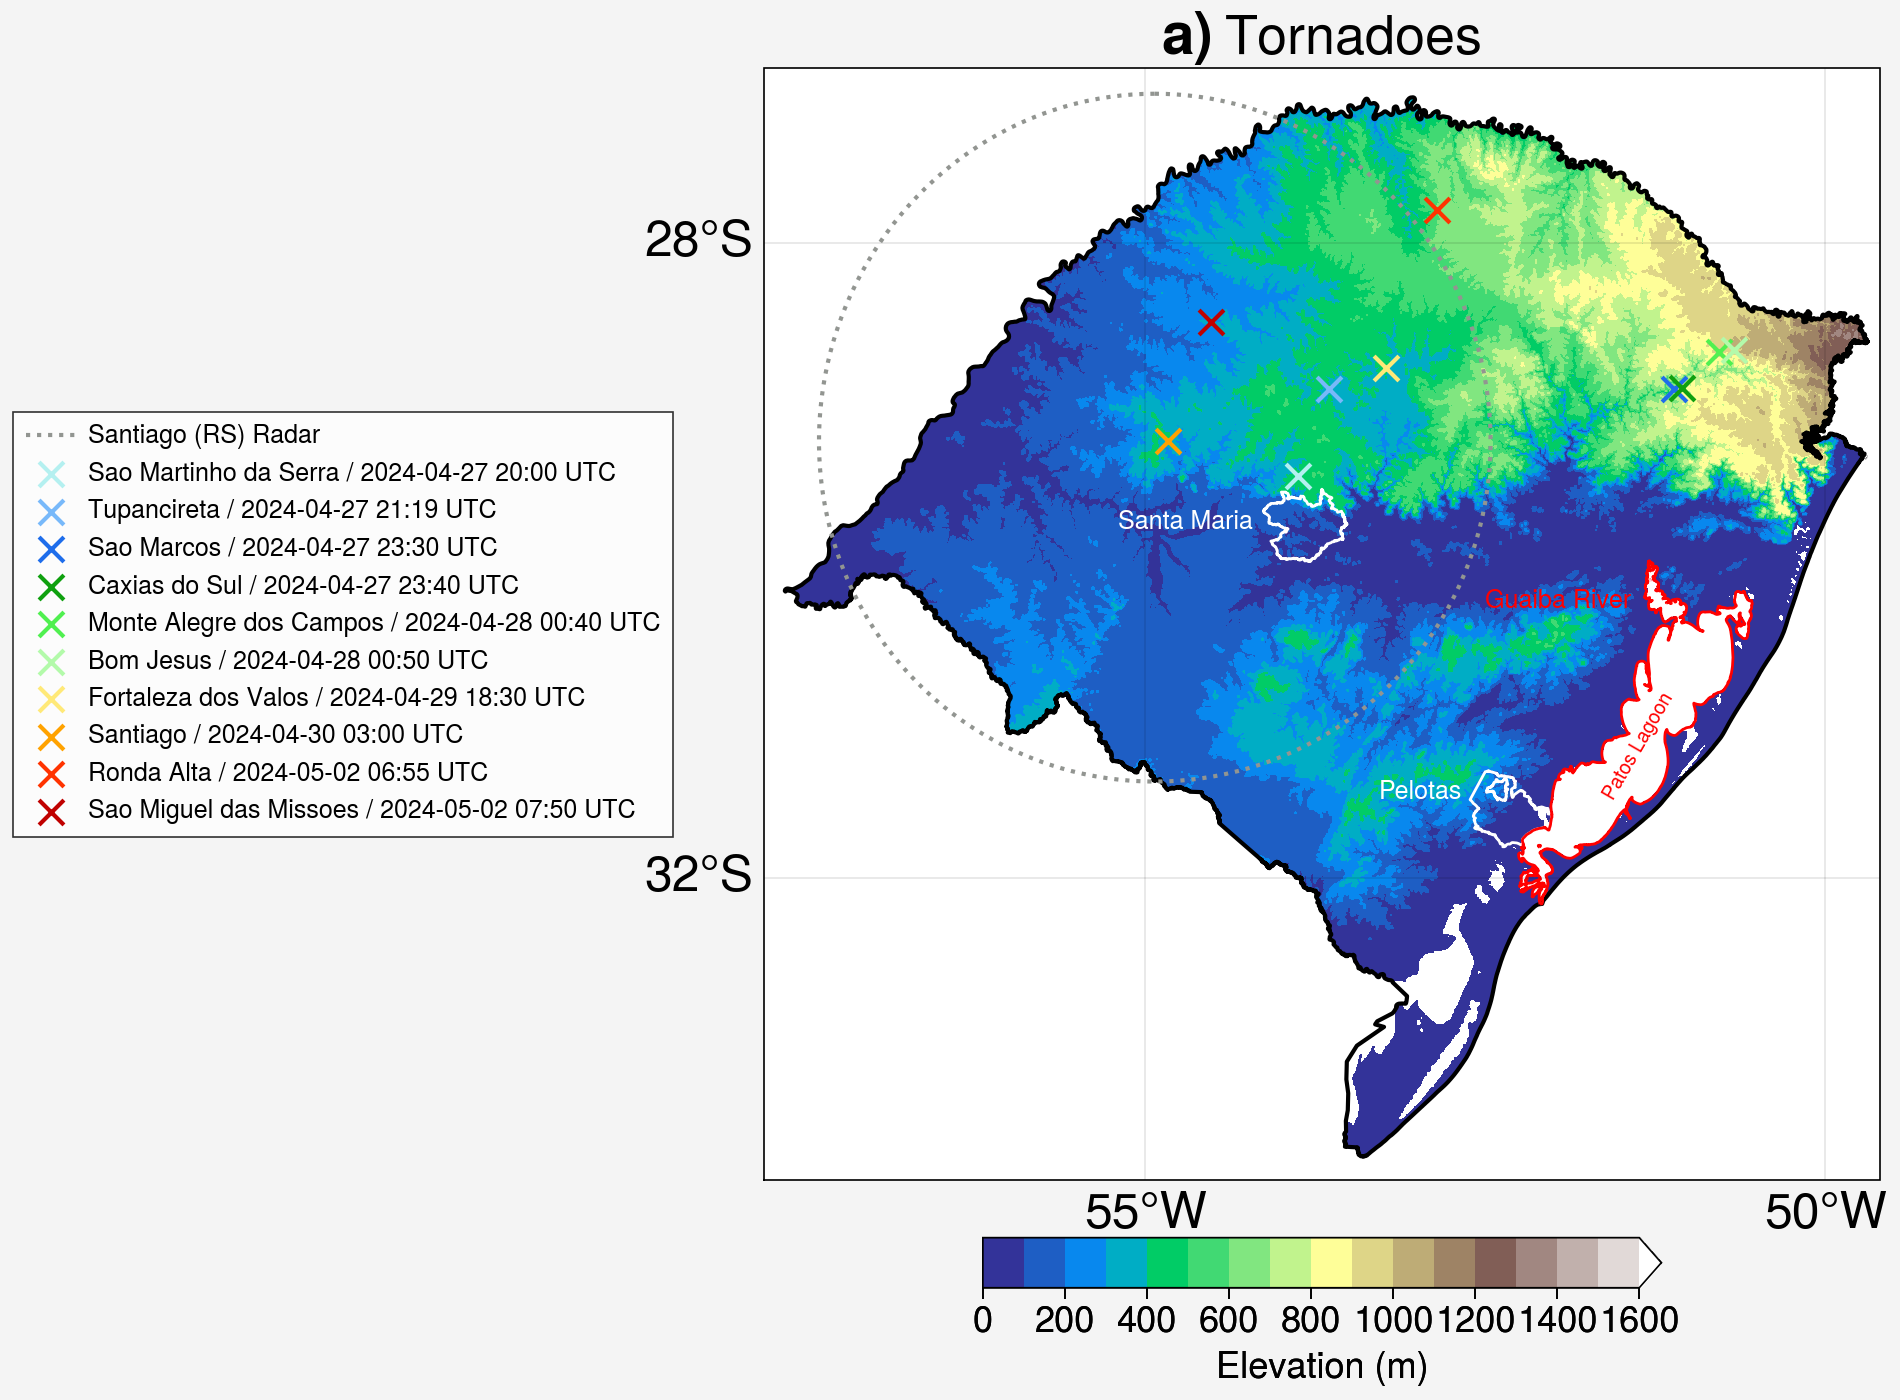

In [87]:
%%time
#========================================================================================================================#
#                                             PARÂMETROS DOS DESASTRES
#========================================================================================================================#
# cores, símbolos e tamanho dos desastres
colors_desastres = ['green', 'white', 'yellow', 'pink', 'bright red' ]
simbols_desastres = ['D','o','^','*', 'x'] # https://matplotlib.org/stable/api/markers_api.html
size_desastres = [80, 70, 60, 50, 40]

#========================================================================================================================#
#                                             CARREGA SHAPEFILES
#========================================================================================================================#
# leitura dos estados
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')

# selecionando os contorno do RS
rs = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'RS')]

# selecionando os contornos dos Estados no mapa
estados_mapa = estados_brasil.loc[(estados_brasil['SIGLA_UF'] == 'RS')]

# municípios
municipios_rs = salem.read_shapefile('https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/RS_Municipios_2019.shp')

santa_maria = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Santa Maria')]
pelotas = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Pelotas')]
porto_alegre = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Porto Alegre')]
lagoa_patos = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Lagoa dos Patos')]
rio_guaiba = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Guaíba')]

shapefile_rs = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/RS/RS_UF_2019.shp')

#========================================================================================================================#
#                                             LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = -57.8, -49.6, -33.9, -26.9

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# fontes do dado de relevo: https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url).sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

# moldura da figura
fig, ax = pplt.subplots(nrows=1, ncols=1, figsize=(9.5, 7), tight=True, proj='pcarree', sharey=True, sharex=True)

# formatação dos eixos
ax.format(small='25px', large='27px', abc=True, abcstyle='a)', abcsize=21, abcloc='c')

#========================================================================================================================#
#                                                   FIG-1
#========================================================================================================================#
#------------------------------------#
#            Relevo
#------------------------------------#
# formatação dos eixos da figura
ax.format(labels=True, 
          latlines=4, lonlines=5, 
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax), 
          ctitle='Tornadoes')

# plota figura
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'][:,:].salem.roi(shape=shapefile_rs),
                   cmap='terrain',
                   vmin=0, vmax=1600,
                   levels=pplt.arange(0, 1600, 100),
                   extend='max')

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# Santa Maria
santa_maria.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Santa Maria', xy=(-55.2, -29.8), fontsize=9, color='white', rotation=0)

# Pelotas
pelotas.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Pelotas', xy=(-53.28, -31.5), fontsize=9, color='white', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=7, color='red', rotation=60)

# Nome Rio Guaíba
ax.annotate('Guaiba River', xy=(-52.5, -30.3), fontsize=9, color='red', rotation=0)

# plota os aneis de distância do radar
#evm_plota_aneis_em_geral_painel([240], -49.47176413, -28.1285956, 'gray', label='Morro da Igreja (SC) Radar', linestyle='solid', axx=0, lww=0.5)
#evm_plota_aneis_em_geral_painel([240], -52.60374, -27.04879, 'gray', label='Chapecó (SC) Radar', linestyle='dotted', axx=0, lww=1.5)
#evm_plota_aneis_em_geral_painel([240], -52.7016774, -31.4039101, 'gray', label='Canguçu (RS) Radar', linestyle='solid', axx=0, lww=0.5)
evm_plota_aneis_em_geral([240], -54.930064194, -29.22521647222, 'gray', label='Santiago (RS) Radar', linestyle='dotted', lww=1.5)

#------------------------------------#
#            Tornados
#------------------------------------#
cores = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

j=0
for i, linha in enumerate(df_cidade_evento.itertuples()):

    # extrai a data do tornado
    data = df_cidade_evento.index[i].strftime('%Y-%m-%d %H:%M UTC')

    # plota tornados
    ax.scatter(linha.lon,
               linha.lat,
               transform=ccrs.PlateCarree(),
               marker='x',
               s=80,
               color=cores[j],
               edgecolors='black',
               label=f'{linha.cidade} / {data}',
               zorder=2)
    j+=2

# legenda dos desastres e radares
ax.legend(loc='l', ncols=1, frameon=True, prop={'size': 9}, markerscale=1.)

# barra de cores
fig.colorbar(map1, loc='b', label='Elevation (m)', ticklabelsize=13, labelsize=13, length=0.60, width=0.25, space=2.3)
        
# salva figura
fig.save('Fig_1a_tornados.png', bbbox_inches='tight', dpi=300, edgecolor="white")

# **5° Passo:** Plota mapa - `REFERÊNCIA ELIMINANDO OS TORNADOS PRÓXIMOS`

In [88]:
df_cidade_evento

,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:30:00,1,20240427,2330,10,-28.9165,-51.1164,0.3,Sao Marcos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa com d...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:40:00,1,20240428,0040,5,-28.6830,-50.7828,0.1,Monte Alegre dos Campos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Destelhamento e r...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...


In [101]:
df_cidade_evento2 = df_cidade_evento.copy()
df_cidade_evento2.drop('2024-04-27 23:30:00', inplace=True)
df_cidade_evento2

,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:40:00,1,20240428,0040,5,-28.6830,-50.7828,0.1,Monte Alegre dos Campos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Destelhamento e r...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...
2024-05-02 07:50:00,1,20240502,0750,20,-28.4983,-54.5166,0.1,Sao Miguel das Missoes,RS,TOR,0.0,HorÃ¡rio estimado por radar.Danos em mata nati...


In [102]:
df_cidade_evento2.iloc[3,11]

'HorÃ¡rio estimado por radar. Destelhamento e residÃªncia destruÃ\xadda na Rua Sivestre Pelissari Sobrinho. Registro Defesa Civil.  Destelhamentos em 38 casas na cidade, queda de Ã¡rvores. Decretada SituaÃ§Ã£o de EmergÃªncia.  https://gauchazh.clicrbs.com.br/pioneiro/geral/noticia/2024/04/temporal-provoca-destelhamento-em-mais-de-30-casas-em-monte-alegre-dos-campos-clvjy3feq007a0161wg3te27w.html,   https://www.facebook.com/permalink.php?story_fbid=pfbid0zVRXNqaaDSFuFBChWvysu6T1x813t7HMQF3of7rpx6rHowXXEwgj6rn2qrsDwwzDl&id=100051192060543, https://www.radiocaxias.com.br/prefeito-de-monte-alegre-dos-campos-afirma-que-vai-decretar-estado-de-emergencia-depois-de-temporal/, https://gauchazh.clicrbs.com.br/geral/noticia/2024/04/temporal-provoca-estragos-em-ao-menos-14-municipios-gauchos-clvjr5lk2005w0161doh2is89.html, https://www.facebook.com/watch/?v=319701314260295, https://www.tuaradio.com.br/Tua-Radio-Fatima/noticias/geral/29-04-2024/monte-alegre-e-bom-jesus-irao-decretar-situacao-de-emer

In [103]:
df_cidade_evento2.iloc[4,11]

'HorÃ¡rio estimado por radar. Rastro estreito em mata nativa. Danos convergente evidente. ObservaÃ§Ã£o por satÃ©lite ambiental. Rastro estreito em vegetaÃ§Ã£o rasteira e mata nativa Danos convergente evidente. ObservaÃ§Ã£o por satÃ©lite ambiental.  HorÃ¡rio estimado por radar. Decretada SituaÃ§Ã£o de EmergÃªncia. Animais feri_dos e mor_tos. Queda de Ã¡rvores (matas de araucÃ¡rias decepadas), postes e destelhamentos na localidade de Potreiro Grande e Itaimbezinho.  https://www.bomjesus.rs.gov.br/noticias/acoes-municipais-em-resposta-aos-danos-causados-pelo-vendaval-e-aviso-de-chuvas-intensas, https://www.facebook.com/esmeralda96FM/posts/pfbid02yBjvVdvo6uoqQXFtJUuSYuG8L7H2Do2CUVqnT3LhQrnzH9kipbKcKeoo2TqPtkW9l, https://gauchazh.clicrbs.com.br/pioneiro/geral/noticia/2024/04/estradas-trancadas-animais-feridos-e-20-casas-destelhadas-os-estragos-do-vendaval-em-bom-jesus-clvk42jhf009701615gbgz3p8.html, https://leouve.com.br/cidades/temporal-atinge-cidades-do-rs-causa-estragos-e-deixa-desabriga

In [104]:
df_cidade_evento2.drop('2024-04-28 00:40:00	', inplace=True)
df_cidade_evento2

,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...
2024-05-02 07:50:00,1,20240502,0750,20,-28.4983,-54.5166,0.1,Sao Miguel das Missoes,RS,TOR,0.0,HorÃ¡rio estimado por radar.Danos em mata nati...


CPU times: total: 12.8 s
Wall time: 36.4 s


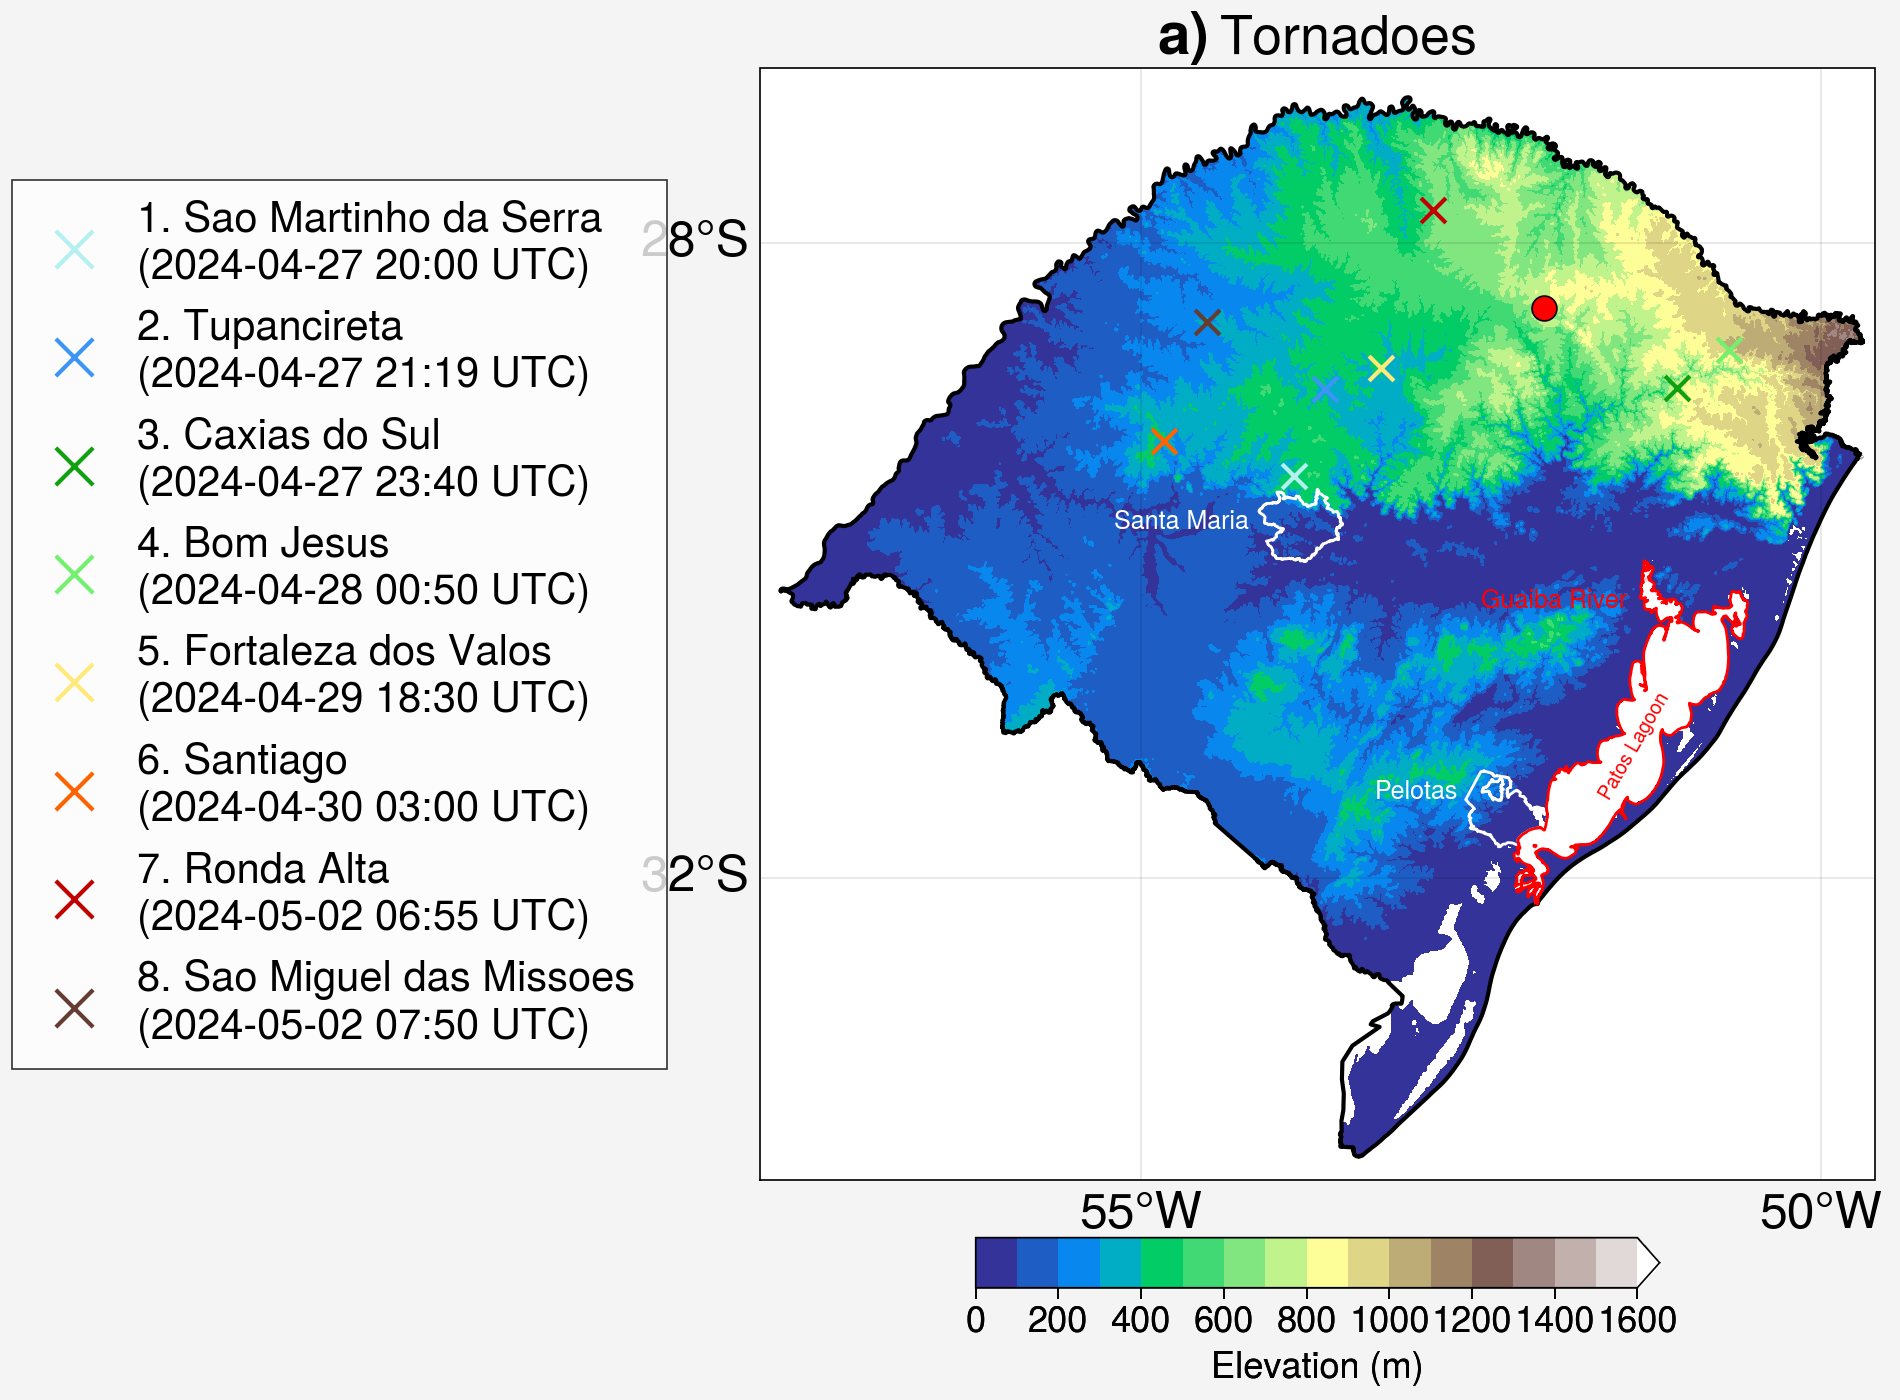

In [151]:
%%time
#========================================================================================================================#
#                                             PARÂMETROS DOS DESASTRES
#========================================================================================================================#
# cores, símbolos e tamanho dos desastres
colors_desastres = ['green', 'white', 'yellow', 'pink', 'bright red' ]
simbols_desastres = ['D','o','^','*', 'x'] # https://matplotlib.org/stable/api/markers_api.html
size_desastres = [80, 70, 60, 50, 40]

#========================================================================================================================#
#                                             CARREGA SHAPEFILES
#========================================================================================================================#
# leitura dos estados
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')

# selecionando os contorno do RS
rs = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'RS')]

# selecionando os contornos dos Estados no mapa
estados_mapa = estados_brasil.loc[(estados_brasil['SIGLA_UF'] == 'RS')]

# municípios
municipios_rs = salem.read_shapefile('https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/RS_Municipios_2019.shp')

santa_maria = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Santa Maria')]
pelotas = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Pelotas')]
porto_alegre = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Porto Alegre')]
lagoa_patos = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Lagoa dos Patos')]
rio_guaiba = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Guaíba')]

shapefile_rs = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/RS/RS_UF_2019.shp')

#========================================================================================================================#
#                                             LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = -57.8, -49.6, -33.9, -26.9

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# fontes do dado de relevo: https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url).sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

# moldura da figura
fig, ax = pplt.subplots(nrows=1, ncols=1, figsize=(9.5, 7), tight=True, proj='pcarree', sharey=True, sharex=True)

# formatação dos eixos
ax.format(small='25px', large='27px', abc=True, abcstyle='a)', abcsize=21, abcloc='c')

#========================================================================================================================#
#                                                   FIG-1
#========================================================================================================================#
#------------------------------------#
#            Relevo
#------------------------------------#
# formatação dos eixos da figura
ax.format(labels=True, 
          latlines=4, lonlines=5, 
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax), 
          ctitle='Tornadoes')

# plota figura
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'][:,:].salem.roi(shape=shapefile_rs),
                   cmap='terrain',
                   vmin=0, vmax=1600,
                   levels=pplt.arange(0, 1600, 100),
                   extend='max')

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# Santa Maria
santa_maria.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Santa Maria', xy=(-55.2, -29.8), fontsize=9, color='white', rotation=0)

# Pelotas
pelotas.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Pelotas', xy=(-53.28, -31.5), fontsize=9, color='white', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=7, color='red', rotation=60)

# Nome Rio Guaíba
ax.annotate('Guaiba River', xy=(-52.5, -30.3), fontsize=9, color='red', rotation=0)

# plota os aneis de distância do radar
#evm_plota_aneis_em_geral_painel([240], -49.47176413, -28.1285956, 'gray', label='Morro da Igreja (SC) Radar', linestyle='solid', axx=0, lww=0.5)
#evm_plota_aneis_em_geral_painel([240], -52.60374, -27.04879, 'gray', label='Chapecó (SC) Radar', linestyle='dotted', axx=0, lww=1.5)
#evm_plota_aneis_em_geral_painel([240], -52.7016774, -31.4039101, 'gray', label='Canguçu (RS) Radar', linestyle='solid', axx=0, lww=0.5)
#evm_plota_aneis_em_geral([240], -54.930064194, -29.22521647222, 'gray', label='Santiago (RS) Radar', linestyle='dotted', lww=1.5)

#------------------------------------#
#            Tornados
#------------------------------------#
cores = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

j=0
for i, linha in enumerate(df_cidade_evento2.itertuples()):

    # extrai a data do tornado
    data = df_cidade_evento2.index[i].strftime('%Y-%m-%d %H:%M UTC')

    # plota tornados
    ax.scatter(linha.lon,
               linha.lat,
               transform=ccrs.PlateCarree(),
               marker='x',
               s=80,
               color=cores[j],
               edgecolors='black',
               label=f'{i+1}. {linha.cidade} \n({data})',
               zorder=2)
    j+=3

# SÃO MARTINS DA SERRA - 2024-04-27
# 2024-04-27 20:00:00	1	20240427	2000	5	-29.4684	-53.8742	0.1	Sao Martinho da Serra
ax.scatter(-53.8742,
           -29.4684,
           transform=ccrs.PlateCarree(),
           marker='o',
           s=120,
           color='red',
           edgecolors='black',
           zorder=2)

# Gentil/RS dia 11/maio/2024
# 2024-05-11 16:50:00	1	20240511	1650	15	-28.4085	-52.0355	0.1	Gentil	RS	TOR	0.0	HorÃ¡rio estimado por radar. Fazenda com danos.
ax.scatter(-52.0355,
           -28.4085,
           transform=ccrs.PlateCarree(),
           marker='o',
           s=120,
           color='red',
           edgecolors='black',
           zorder=2)



    
# legenda dos desastres e radares
ax.legend(loc='l', ncols=1, frameon=True, prop={'size': 15}, markerscale=1.5)

# barra de cores
fig.colorbar(map1, loc='b', label='Elevation (m)', ticklabelsize=13, labelsize=13, length=0.60, width=0.25, space=2.3)
        
# salva figura
fig.save('Fig_1b_tornados.png', bbbox_inches='tight', dpi=300, edgecolor="white")

# **6° Passo:** Plota mapa - `CERTO`

CPU times: total: 13.1 s
Wall time: 34.2 s


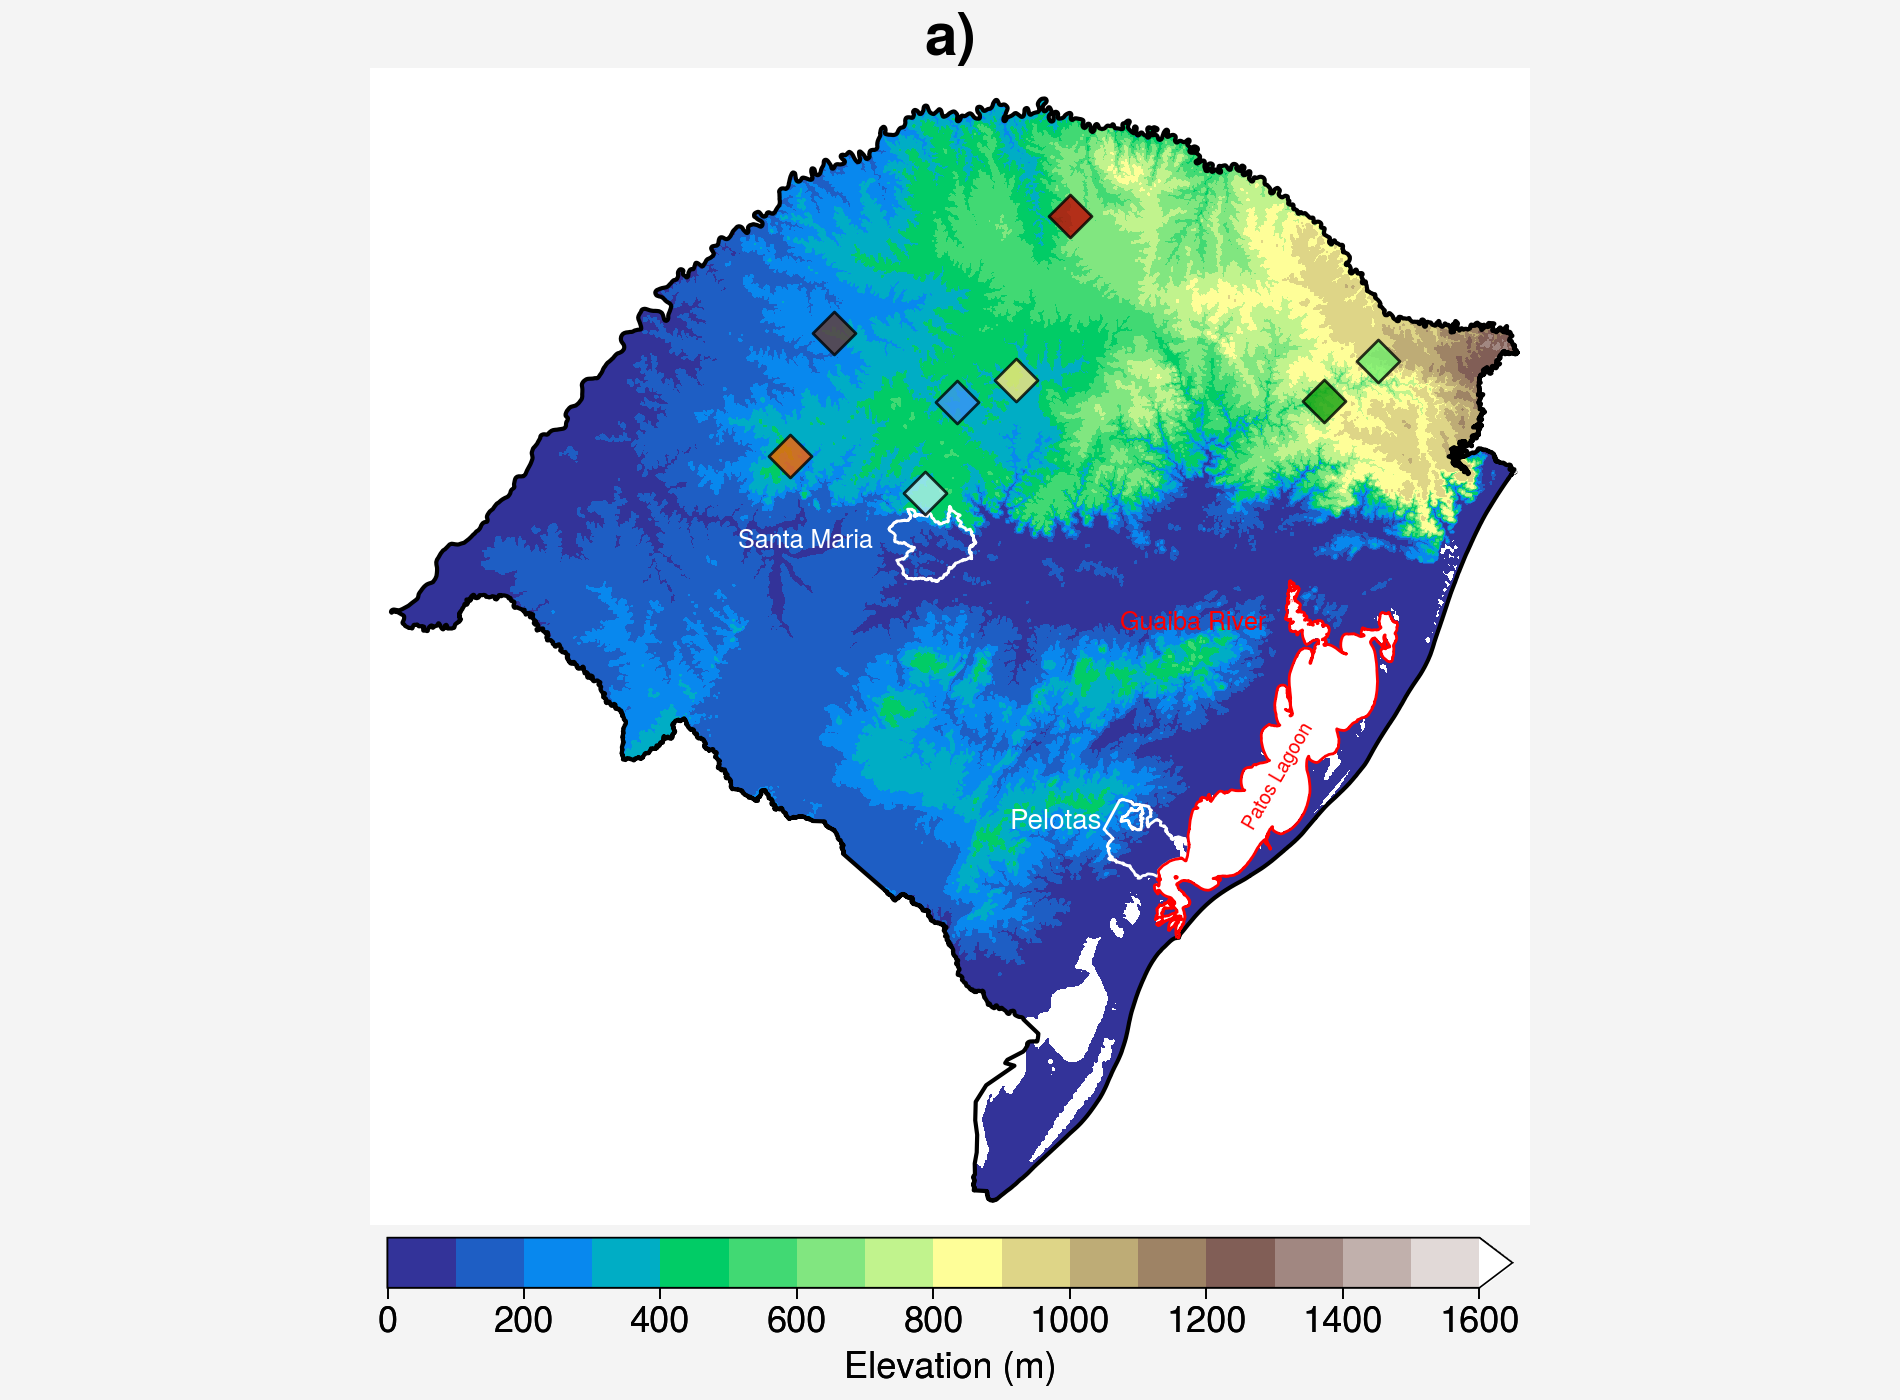

In [135]:
%%time
#========================================================================================================================#
#                                             PARÂMETROS DOS DESASTRES
#========================================================================================================================#
# cores, símbolos e tamanho dos desastres
colors_desastres = ['green', 'white', 'yellow', 'pink', 'bright red' ]
simbols_desastres = ['D','o','^','*', 'x'] # https://matplotlib.org/stable/api/markers_api.html
size_desastres = [80, 70, 60, 50, 40]

#========================================================================================================================#
#                                             CARREGA SHAPEFILES
#========================================================================================================================#
# leitura dos estados
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')

# selecionando os contorno do RS
rs = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'RS')]

# selecionando os contornos dos Estados no mapa
estados_mapa = estados_brasil.loc[(estados_brasil['SIGLA_UF'] == 'RS')]

# municípios
municipios_rs = salem.read_shapefile('https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/RS_Municipios_2019.shp')

santa_maria = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Santa Maria')]
pelotas = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Pelotas')]
porto_alegre = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Porto Alegre')]
lagoa_patos = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Lagoa dos Patos')]
rio_guaiba = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Guaíba')]

shapefile_rs = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/RS/RS_UF_2019.shp')

#========================================================================================================================#
#                                             LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = -57.8, -49.6, -33.9, -26.9

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# fontes do dado de relevo: https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url).sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

# moldura da figura
fig, ax = pplt.subplots(nrows=1, ncols=1, figsize=(9.5, 7), tight=True, proj='pcarree', sharey=True, sharex=True)

# formatação dos eixos
ax.format(small='25px', large='27px', abc=True, abcstyle='a)', abcsize=21, abcloc='c')

#========================================================================================================================#
#                                                   FIG-1
#========================================================================================================================#
#------------------------------------#
#            Relevo
#------------------------------------#
# formatação dos eixos da figura
ax.format(labels=False, 
          latlines=4, lonlines=5, 
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          linewidth=0, grid=False)

# plota figura
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'][:,:].salem.roi(shape=shapefile_rs),
                   cmap='terrain',
                   vmin=0, vmax=1600,
                   levels=pplt.arange(0, 1600, 100),
                   extend='max')

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# Santa Maria
santa_maria.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Santa Maria', xy=(-55.2, -29.8), fontsize=9, color='white', rotation=0)

# Pelotas
pelotas.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Pelotas', xy=(-53.28, -31.5), fontsize=10, color='white', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax)
ax.annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=7, color='red', rotation=60)

# Nome Rio Guaíba
ax.annotate('Guaiba River', xy=(-52.5, -30.3), fontsize=9, color='red', rotation=0)

# plota os aneis de distância do radar
#evm_plota_aneis_em_geral_painel([240], -49.47176413, -28.1285956, 'gray', label='Morro da Igreja (SC) Radar', linestyle='solid', axx=0, lww=0.5)
#evm_plota_aneis_em_geral_painel([240], -52.60374, -27.04879, 'gray', label='Chapecó (SC) Radar', linestyle='dotted', axx=0, lww=1.5)
#evm_plota_aneis_em_geral_painel([240], -52.7016774, -31.4039101, 'gray', label='Canguçu (RS) Radar', linestyle='solid', axx=0, lww=0.5)
#evm_plota_aneis_em_geral([240], -54.930064194, -29.22521647222, 'gray', label='Santiago (RS) Radar', linestyle='dotted', lww=1.5)

#------------------------------------#
#            Tornados
#------------------------------------#
cores = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

j=0
for i, linha in enumerate(df_cidade_evento2.itertuples()):

    # extrai a data do tornado
    data = df_cidade_evento2.index[i].strftime('%Y-%m-%d %H:%M UTC')

    # plota tornados. Exemplo curso de nowcasting:  #facecolor='white', edgecolor='black'
    ax.scatter(linha.lon,
               linha.lat,
               
               transform=ccrs.PlateCarree(),
               
               marker='D',
               s=120,
               
               facecolor=cores[j],
               edgecolor='black',
               
               linewidth=1, 
               alpha=0.8, 
               zorder=2,
               
               label=f'{linha.cidade} / {data}')
    
    j+=3

# legenda dos desastres e radares
#ax.legend(loc='l', ncols=1, frameon=True, prop={'size': 15}, markerscale=1.)

# barra de cores
fig.colorbar(map1, loc='b', label='Elevation (m)', ticklabelsize=13, labelsize=13, length=0.60, width=0.25, space=0.5)
        
# salva figura
fig.save('Fig_1c_tornados.png', bbbox_inches='tight', dpi=300, edgecolor="white")

In [136]:
df_cidade_evento2

,nivel_qualidade,data,hormin,incerteza_temporal_min,lat,lon,incerteza_localizacao_km,cidade,estado,tipo,intensidade,noticia
data_completa,,,,,,,,,,,,
2024-04-27 20:00:00,1,20240427,2000,5,-29.4684,-53.8742,0.1,Sao Martinho da Serra,RS,TOR,0.0,HorÃ¡rio estimado por radar. Decretada SituaÃ§...
2024-04-27 21:19:00,2,20240427,2119,5,-28.9184,-53.6489,4.0,Tupancireta,RS,TOR,0.0,HorÃ¡rio estimado por radar. TOR supercelular ...
2024-04-27 23:40:00,1,20240427,2340,10,-28.9153,-51.0555,0.1,Caxias do Sul,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata nativa total...
2024-04-28 00:50:00,1,20240428,0050,5,-28.6708,-50.6743,0.1,Bom Jesus,RS,TOR,0.0,HorÃ¡rio estimado por radar. Rastro estreito e...
2024-04-29 18:30:00,1,20240429,1830,30,-28.7863,-53.2327,2.5,Fortaleza dos Valos,RS,TOR,0.0,HorÃ¡rio estimado por radar. Tornado filmado p...
2024-04-30 03:00:00,1,20240430,0300,15,-29.2484,-54.8313,0.1,Santiago,RS,TOR,0.0,HorÃ¡rio estimado por radar. Mata e casas com ...
2024-05-02 06:55:00,1,20240502,0655,5,-27.7923,-52.8531,0.1,Ronda Alta,RS,TOR,0.0,HorÃ¡rio estimado por radar. Danos em fazenda ...
2024-05-02 07:50:00,1,20240502,0750,20,-28.4983,-54.5166,0.1,Sao Miguel das Missoes,RS,TOR,0.0,HorÃ¡rio estimado por radar.Danos em mata nati...


In [139]:
condicao = df_cidade_evento2['cidade'] == 'Tupancireta'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar. TOR supercelular filmado e fotografado (spin-up confirmado por meteorologistas e caÃ§adores de tempestades). '],
      dtype=object)

In [140]:
condicao = df_cidade_evento2['cidade'] == 'Caxias do Sul'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar. Mata nativa totalmente decepada. ObservaÃ§Ã£o por satÃ©lite ambiental. '],
      dtype=object)

In [142]:
condicao = df_cidade_evento2['cidade'] == 'Bom Jesus'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar. Rastro estreito em mata nativa. Danos convergente evidente. ObservaÃ§Ã£o por satÃ©lite ambiental. Rastro estreito em vegetaÃ§Ã£o rasteira e mata nativa Danos convergente evidente. ObservaÃ§Ã£o por satÃ©lite ambiental.  HorÃ¡rio estimado por radar. Decretada SituaÃ§Ã£o de EmergÃªncia. Animais feri_dos e mor_tos. Queda de Ã¡rvores (matas de araucÃ¡rias decepadas), postes e destelhamentos na localidade de Potreiro Grande e Itaimbezinho.  https://www.bomjesus.rs.gov.br/noticias/acoes-municipais-em-resposta-aos-danos-causados-pelo-vendaval-e-aviso-de-chuvas-intensas, https://www.facebook.com/esmeralda96FM/posts/pfbid02yBjvVdvo6uoqQXFtJUuSYuG8L7H2Do2CUVqnT3LhQrnzH9kipbKcKeoo2TqPtkW9l, https://gauchazh.clicrbs.com.br/pioneiro/geral/noticia/2024/04/estradas-trancadas-animais-feridos-e-20-casas-destelhadas-os-estragos-do-vendaval-em-bom-jesus-clvk42jhf009701615gbgz3p8.html, https://leouve.com.br/cidades/temporal-atinge-cidades-do-rs-causa-estragos-e-deixa-de

In [143]:
condicao = df_cidade_evento2['cidade'] == 'Fortaleza dos Valos'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar. Tornado filmado por moradora em Ã¡rea do interior e visto ao longe por caÃ§adores de tempestades Ã\xa0 distÃ¢ncia.'],
      dtype=object)

In [144]:
condicao = df_cidade_evento2['cidade'] == 'Santiago'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar. Mata e casas com danos. ObservaÃ§Ã£o por satÃ©lite ambiental. Queda de Ã¡rvores, Matas decepadas. Danos conergentes. Localidade de Cerca de Pedra. https://www.facebook.com/watch/?v=786368943158334&ref=sharing, https://diariosm.com.br/noticias/geral/_vendaval_derruba_galpoes_e_deixa_casa_destelhada_em_santiago_defesa_civil_trabalha_com_hipotese_de_microexplosao.590978, https://www.santiago.rs.gov.br/noticias/geral/vento-causou-estragos-no-interior-de-santiago, https://www.instagram.com/p/C6Y0QyIgoqG/'],
      dtype=object)

In [145]:
condicao = df_cidade_evento2['cidade'] == 'Ronda Alta'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar. Danos em fazenda (telhas espalhados a 300 m) e mata. ObservaÃ§Ã£o por satÃ©lite ambiental. '],
      dtype=object)

In [147]:
condicao = df_cidade_evento2['cidade'] == 'Sao Miguel das Missoes'
df_cidade_evento2[condicao]['noticia'].values

array(['HorÃ¡rio estimado por radar.Danos em mata nativa. PossÃ\xadvel danos convergentes. ObservaÃ§Ã£o por satÃ©lite ambiental. '],
      dtype=object)